In [1]:

exec(open("./funcs/mmj_functions.py").read())
exec(open("./funcs/algo_4_funcs.py").read())


In [2]:
exec(open("./funcs/mmj_classifier_funcs.py").read())

In [3]:
def MMJ_K_means_using_PAM_algo_return_centers_idx(X, num_clusters, mmj_matrix_squared, plot = False): 

    
    km_model = kmedoids.fasterpam(mmj_matrix_squared, num_clusters)        
 
    label = km_model.labels
    centers_idx = [[ii] for ii in km_model.medoids]
    dis_to_medoids = np.array([[mmj_matrix[i,j] for j in km_model.medoids] for i in range(len(X))])
    min_dis_to_medoids = np.min(dis_to_medoids, axis = 1)

    strong_ambi_p_idx, weak_ambi_p_idx = [], []
    for i, _ in enumerate(dis_to_medoids):   
        ppp = np.sum(dis_to_medoids[i] == min_dis_to_medoids[i])
        if  ppp == 1:
            pass      
        elif ppp == num_clusters:
            strong_ambi_p_idx.append(i)      
        else:
            weak_ambi_p_idx.append(i)
    if plot: 
        if strong_ambi_p_idx or weak_ambi_p_idx:
            plot_2D_or_3D_data_empty_circles_weak_strong_multi_one_scom(X, label,centers_idx, strong_ambi_p_idx, weak_ambi_p_idx)        
        else:
            plot_2D_or_3D_data(X, label, centers_idx = centers_idx, plot_center = 1)
        
    return [label, strong_ambi_p_idx, weak_ambi_p_idx, centers_idx]


In [4]:
test_data_145 = pickle.load(  open( "./data/test_data_145.p", "rb" ) ) 
true_K_145 =  pickle.load(  open( "./data/true_num_of_145.p", "rb" ) ) 
 

In [5]:

data_id = 89

X = test_data_145[data_id] 

num_clusters = true_K_145[data_id]



In [6]:
# Calculate MMJ distance matrix with Algorithm 4, implementation and testing of Algorithm 4 see another paper:
# http://www.arxiv.org/abs/2407.07058

mmj_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X) 
mmj_matrix_squared = mmj_matrix**2

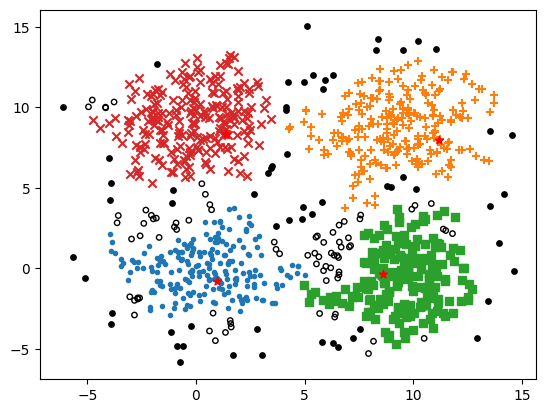

In [7]:

label, strong_ambi_p_idx, weak_ambi_p_idx, centers_idx = \
MMJ_K_means_using_PAM_algo_return_centers_idx(X, num_clusters, mmj_matrix_squared, plot = True)



In [8]:
new_label = cal_new_label_with_mmj_classifier(X, label, strong_ambi_p_idx, weak_ambi_p_idx)

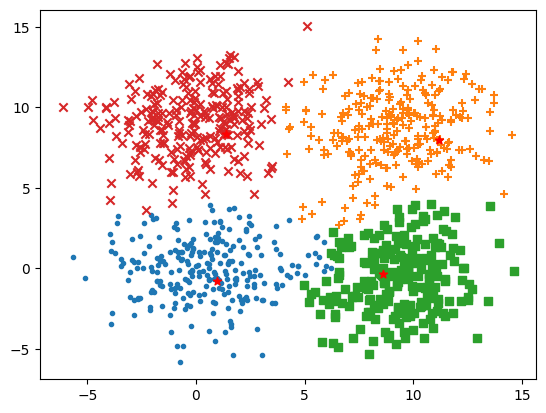

In [9]:
plot_2D_or_3D_data(X, new_label, centers_idx = centers_idx, plot_center = 1)

In [10]:

border_p = strong_ambi_p_idx + weak_ambi_p_idx
 
X_border_p = X[border_p]    

X_border_p_label = cal_label_for_new_points_with_mmj_classifier(X, label, strong_ambi_p_idx, weak_ambi_p_idx, X_border_p) 


In [11]:
new_label_another_method= label.copy()

for i,k in enumerate(border_p):
    new_label_another_method[k] = X_border_p_label[i]
    

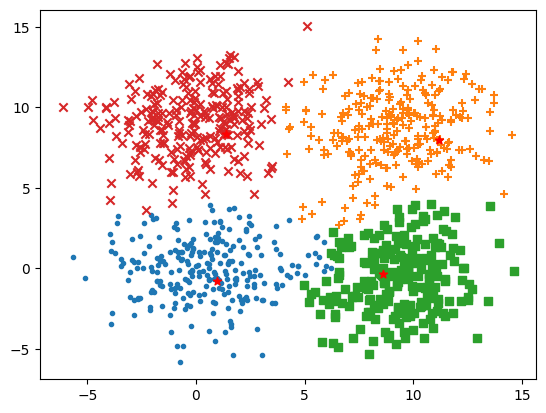

In [12]:
plot_2D_or_3D_data(X, new_label_another_method, centers_idx = centers_idx, plot_center = 1)

In [13]:
np.allclose(new_label_another_method, new_label)

True